In [1]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Problem Statement

Can you predict the type of the complaint based on the given variables?

# Objective

The goal here is to understand what factors contribute most to Complaint Type and create a model that can predict if a certain it. Need to analysis of Independent Variables and then model the algorithm

# Pipeline

1. Clean Data

2. Exploring the data will follow right after and allow further insight of what our dataset contains. 

3. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our prediction of categorical variable COMPLAINT TYPE

In [2]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\Bronx.csv",error_bad_lines=False)


In [3]:
df.compute()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842656,2014-04-14 11:04:00,2015-05-01 14:00:00,DEP,Department of Environmental Protection,Sewer,Catch Basin Sunken/Damaged/Raised (SC1),NaN,10460,880 EAST TREMONT AVENUE,...,Unspecified,BRONX,40.842790,-73.885846,"(40.842789784424255, -73.88584568128475)",382.0,382.0,2014,4,0
1,27842674,2014-04-14 09:32:00,2014-04-15 12:20:00,DEP,Department of Environmental Protection,Water System,Hydrant Running (WC3),NaN,10467,60 THWAITES PLACE,...,Unspecified,BRONX,40.858885,-73.870400,"(40.85888489249614, -73.87039977678938)",1.0,1.0,2014,4,0
2,27842700,2014-04-14 00:00:00,2014-04-18 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10467,3332 HULL AVENUE,...,Unspecified,BRONX,40.877717,-73.873842,"(40.87771733636356, -73.87384175204606)",4.0,4.0,2014,4,0
3,27842709,2014-04-14 00:00:00,2014-04-22 15:40:43,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10463,3052 KINGSBRIDGE AVENUE,...,Unspecified,BRONX,40.879075,-73.907260,"(40.87907471506111, -73.90725980373738)",8.0,8.0,2014,4,0
4,27842720,2014-04-14 15:51:18,2014-04-14 15:51:18,DOT,Department of Transportation,Street Condition,Pothole,NaN,10472,NaN,...,Unspecified,BRONX,40.834769,-73.869941,"(40.83476936593012, -73.86994082616778)",0.0,0.0,2014,4,0
5,27842734,2014-04-14 17:23:18,2014-05-01 09:30:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10465,3152 MIDDLETOWN ROAD,...,Unspecified,BRONX,40.846245,-73.824670,"(40.84624546291458, -73.82466988610496)",16.0,16.0,2014,4,0
6,27842743,2014-04-14 09:46:14,2014-04-27 14:40:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10463,595 WEST 239 STREET,...,Unspecified,BRONX,40.889584,-73.910829,"(40.88958419642961, -73.91082933051116)",13.0,13.0,2014,4,0
7,27842746,2014-04-14 10:05:08,2014-05-01 08:30:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10464,NaN,...,Unspecified,BRONX,40.859138,-73.818234,"(40.85913837629409, -73.8182335743896)",16.0,16.0,2014,4,0
8,27842763,2014-04-14 08:30:00,2014-04-14 12:00:00,DSNY,BCC - Bronx,Derelict Vehicles,14 Derelict Vehicles,Street,10457,464 EAST 179 STREET,...,Unspecified,BRONX,40.849788,-73.897075,"(40.84978837706446, -73.8970750019827)",0.0,0.0,2014,4,0
9,27842769,2014-04-14 14:16:00,2014-04-15 12:00:00,DSNY,BCC - Bronx,Sanitation Condition,12 Dead Animals,Sidewalk,10472,NaN,...,Unspecified,BRONX,40.830384,-73.856991,"(40.83038444809873, -73.85699130197348)",0.0,0.0,2014,4,0


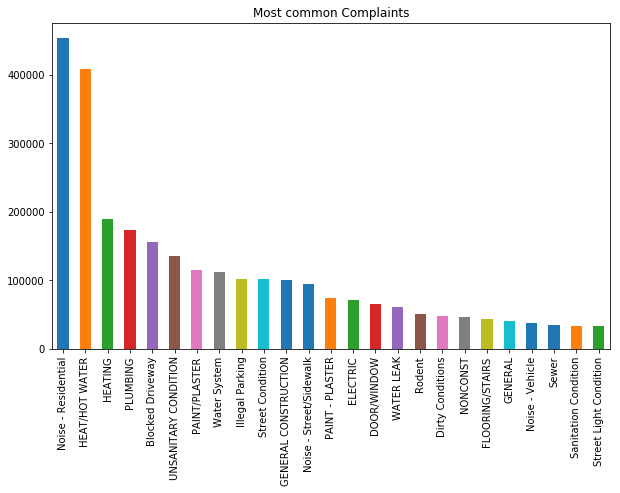

In [4]:
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

### Applying Lemmitization for Resolution Description Ex: cats --> cat

In [5]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame()

,Resolution Description
0,"The Department of Environmental Protection inspected your complaint and repaired the problem. If the condition returns, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint."
1,"The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint."
2,The Department of Health and Mental Hygiene will review your complaint to determine appropriate action. Complaints of this type usually result in an inspection. Please call 311 in 30 days from the date of your complaint for status
3,The Department of Transportation determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
4,The Department of Transportation inspected this complaint and repaired the problem.
5,The Department of Sanitation removed the items.
6,The Department of Sanitation investigated this complaint and found no condition at the location.
7,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
8,The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.
9,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.


In [6]:
#[k for k, v in locals().items() if isinstance(v, str) and v == df["Resolution Description"]][0]
df["Resolution Description"]= df["Resolution Description"].astype(str) 

#### Remove Digits
#### Remove Punctuation
#### Remove StopWords   Ex:A AN THE IS .....
###### StemPorter does the below     root word "like" include:->"likes"->"liked"->"likely"->"liking"


In [7]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)

df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [9]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame().head()

,Resolution Description
0,department environmental protection inspected complaint repaired problem condition returns please call or calling nonnew york city area code submit new complaint
1,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
2,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
3,department transportation determined complaint duplicate previously filed complaint original complaint address
4,department transportation inspected complaint repaired problem


#### Descriptor

In [10]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,Catch Basin Sunken/Damaged/Raised (SC1)
1,Hydrant Running (WC3)
2,Rat Sighting
3,Pothole
4,14 Derelict Vehicles


##### Applying ABOVE to Descriptor

In [11]:
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df['Descriptor']= df['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [12]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,catch basin sunkendamagedraised sc
1,hydrant running wc
2,rat sight
3,pothol
4,derelict vehicl


In [13]:
pd.set_option('display.max_rows',500)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842656,2014-04-14 11:04:00,2015-05-01 14:00:00,DEP,Department of Environmental Protection,Sewer,catch basin sunkendamagedraised sc,NaN,10460,880 EAST TREMONT AVENUE,...,Unspecified,BRONX,40.842790,-73.885846,"(40.842789784424255, -73.88584568128475)",382.0,382.0,2014,4,0
1,27842674,2014-04-14 09:32:00,2014-04-15 12:20:00,DEP,Department of Environmental Protection,Water System,hydrant running wc,NaN,10467,60 THWAITES PLACE,...,Unspecified,BRONX,40.858885,-73.870400,"(40.85888489249614, -73.87039977678938)",1.0,1.0,2014,4,0
2,27842700,2014-04-14 00:00:00,2014-04-18 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,rat sight,1-2 Family Dwelling,10467,3332 HULL AVENUE,...,Unspecified,BRONX,40.877717,-73.873842,"(40.87771733636356, -73.87384175204606)",4.0,4.0,2014,4,0
3,27842709,2014-04-14 00:00:00,2014-04-22 15:40:43,DOHMH,Department of Health and Mental Hygiene,Rodent,rat sight,3+ Family Apt. Building,10463,3052 KINGSBRIDGE AVENUE,...,Unspecified,BRONX,40.879075,-73.907260,"(40.87907471506111, -73.90725980373738)",8.0,8.0,2014,4,0
4,27842720,2014-04-14 15:51:18,2014-04-14 15:51:18,DOT,Department of Transportation,Street Condition,pothol,NaN,10472,NaN,...,Unspecified,BRONX,40.834769,-73.869941,"(40.83476936593012, -73.86994082616778)",0.0,0.0,2014,4,0


##### Checking our Descriptors with Target Variable

In [14]:
df[['Complaint Type','Agency','Descriptor','Resolution Description']].head()

,Complaint Type,Agency,Descriptor,Resolution Description
0,Sewer,DEP,catch basin sunkendamagedraised sc,department environmental protection inspected complaint repaired problem condition returns please call or calling nonnew york city area code submit new complaint
1,Water System,DEP,hydrant running wc,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
2,Rodent,DOHMH,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
3,Rodent,DOHMH,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
4,Street Condition,DOT,pothol,department transportation determined complaint duplicate previously filed complaint original complaint address


#### I would make use of descriptor/n in my model or atleast while refining my target variable I would use it

In [15]:
df[['Location Type','Location','Latitude','Longitude']].head()

,Location Type,Location,Latitude,Longitude
0,NaN,"(40.842789784424255, -73.88584568128475)",40.842790,-73.885846
1,NaN,"(40.85888489249614, -73.87039977678938)",40.858885,-73.870400
2,1-2 Family Dwelling,"(40.87771733636356, -73.87384175204606)",40.877717,-73.873842
3,3+ Family Apt. Building,"(40.87907471506111, -73.90725980373738)",40.879075,-73.907260
4,NaN,"(40.83476936593012, -73.86994082616778)",40.834769,-73.869941


## Check out for plots after conversion to pandas dataframe

##### CHECK MISSING VALUES BY %

In [16]:
missing_values = df.isnull().sum()
missing_count = ((missing_values / df.index.size) * 100)
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct


[########################################] | 100% Completed |  6min 56.1s


Unique Key                        0.000000 
Created Date                      0.000000 
Closed Date                       0.000000 
Agency                            0.000000 
Agency Name                       0.000000 
Complaint Type                    0.000000 
Descriptor                        0.000000 
Location Type                     13.822960
Incident Zip                      0.000000 
Incident Address                  10.097865
Street Name                       10.097922
Cross Street 1                    35.822983
Cross Street 2                    35.927078
Address Type                      3.452658 
City                              0.000000 
Status                            0.000000 
Resolution Description            0.000000 
Resolution Action Updated Date    0.000000 
Community Board                   0.000000 
BBL                               10.784837
Borough                           0.000000 
X Coordinate (State Plane)        2.987393 
Y Coordinate (State Plane)      

##### Here are some of the conclusions I can draw
1. None of the Values are above 50% missing so its fine to keep
2.I dont think even the variables like Location Type /Street Name would be of use to the model as we already have "Location"
3. Location,Latitude and Logitude are missing by just 4% (Negligible)
4. Need to analyze address type column and see if it is of use
5. I would use below columns for my model
6. Need to status of complaint over years
7. Target Variable have nans? ------ NO beacuse we already seen the graph above that ahs no major nulls
8. Location = (Latitude,Longitude)
8. Our Target variable is complaint type so status of incident is not a requirement in model for now
"Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude",,"Total_Time","Resolution_Time","Year","Month ","DayofWeek"  ----> 15 Independent Variables


#### Location Type

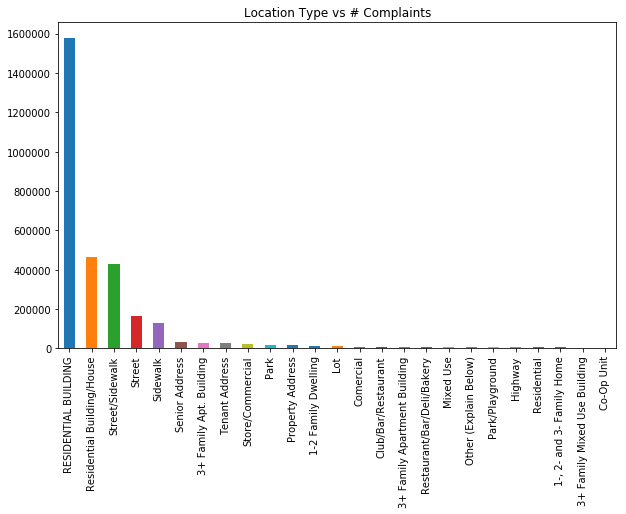

In [17]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

###### LOCATION TYPE: Remove Punctuations and convert them into lowe case 

In [18]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


In [19]:
df['Location Type'].head()

0    nan                  
1    nan                  
2    12 family dwelling   
3    3 family apt building
4    nan                  
Name: Location Type, dtype: object

In [20]:
location_type = df['Location Type'].value_counts().compute()
location_type = location_type.sort_values(ascending=True)
#Reversing array as maximum number of complaintS should appear first 
location_type[::-1]

residential building                  1580163
nan                                   487747 
residential buildinghouse             462277 
streetsidewalk                        428137 
street                                165275 
sidewalk                              131594 
senior address                        32324  
3 family apt building                 27697  
tenant address                        25803  
storecommercial                       21549  
park                                  19290  
property address                      17861  
12 family dwelling                    13048  
lot                                   11029  
comercial                             9295   
clubbarrestaurant                     9130   
3 family apartment building           7818   
restaurantbardelibakery               6490   
mixed use                             6321   
other explain below                   6239   
parkplayground                        5677   
highway                           

In [21]:
df[["Location","Location Type","Latitude","Longitude","Incident Address","Address Type"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address,Address Type
0,"(40.842789784424255, -73.88584568128475)",nan,40.842790,-73.885846,880 EAST TREMONT AVENUE,ADDRESS
1,"(40.85888489249614, -73.87039977678938)",nan,40.858885,-73.870400,60 THWAITES PLACE,BLOCKFACE
2,"(40.87771733636356, -73.87384175204606)",12 family dwelling,40.877717,-73.873842,3332 HULL AVENUE,ADDRESS
3,"(40.87907471506111, -73.90725980373738)",3 family apt building,40.879075,-73.907260,3052 KINGSBRIDGE AVENUE,ADDRESS
4,"(40.83476936593012, -73.86994082616778)",nan,40.834769,-73.869941,NaN,INTERSECTION
5,"(40.84624546291458, -73.82466988610496)",nan,40.846245,-73.824670,3152 MIDDLETOWN ROAD,ADDRESS
6,"(40.88958419642961, -73.91082933051116)",nan,40.889584,-73.910829,595 WEST 239 STREET,ADDRESS
7,"(40.85913837629409, -73.8182335743896)",nan,40.859138,-73.818234,NaN,INTERSECTION
8,"(40.84978837706446, -73.8970750019827)",street,40.849788,-73.897075,464 EAST 179 STREET,ADDRESS
9,"(40.83038444809873, -73.85699130197348)",sidewalk,40.830384,-73.856991,NaN,INTERSECTION


1. Locaion Type has >80000 null values which is bit bothering
2. First Can we predict Location Type?
3. If so How to to predict it/Check Acurracy?   --> Agency , Latitude, Longitude, Incizent Zip lets try ...
4. Incident Address Cannot identify the type of location at all

In [22]:
df["Address Type"].unique()

Dask Series Structure:
npartitions=1
    object
    ...   
Name: Address Type, dtype: object
Dask Name: unique-agg, 1413 tasks

#############################################################################################################
############################################################################################################
###############################################################################################################
##################################################################################################################
####################################################################################################################

## Converting DASK to Pandas Dataframe

In [23]:
df = df.compute()

In [24]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
81560,27842620,2014-04-14 16:14:48,2014-04-14 20:20:18,NYPD,New York City Police Department,Illegal Parking,blocked sidewalk,streetsidewalk,10469,NaN,...,Unspecified,BRONX,40.865223,-73.836186,"(40.865222821487684, -73.83618557744099)",0.0,0.0,2014,4,0
81561,27842631,2014-04-14 20:56:00,2014-04-15 10:13:00,DEP,Department of Environmental Protection,Noise,noise barking dog nr,nan,10458,2420 PROSPECT AVENUE,...,Unspecified,BRONX,40.854141,-73.882457,"(40.85414123539392, -73.88245719312344)",0.0,0.0,2014,4,0
81562,27842646,2014-04-14 17:06:00,2014-04-17 18:30:00,DEP,Department of Environmental Protection,Noise,noise construction beforeafter hours nm,nan,10460,95 EAST 173 STREET,...,Unspecified,BRONX,40.834949,-73.886539,"(40.834948826735896, -73.8865385235622)",3.0,3.0,2014,4,0
81563,27842653,2014-04-14 13:26:00,2014-04-18 10:45:00,DEP,Department of Environmental Protection,Sewer,catch basin cloggedflooding use comments sc,nan,10469,2305 ELY AVENUE,...,Unspecified,BRONX,40.859879,-73.830324,"(40.859878648052884, -73.83032415755054)",3.0,3.0,2014,4,0
81564,27842654,2014-04-14 09:06:00,2014-04-14 09:34:00,DEP,Department of Environmental Protection,Sewer,sewer backup use comments sa,nan,10472,1691 EAST 174 STREET,...,Unspecified,BRONX,40.834476,-73.872254,"(40.83447552234542, -73.87225419756115)",0.0,0.0,2014,4,0


##### Removing NULL values of Location Latitude and Longitude from my dataset as they constitude 4% of missing values

In [25]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]

###### Analysisng our Target Variable with IVs

(-73.98337414525642, -73.76821271867063, 40.741805068666615, 40.92640133948325)

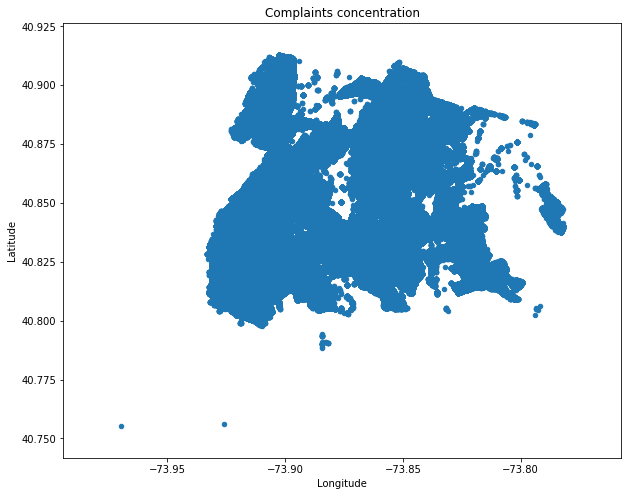

In [26]:
df.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration').axis('equal')

(-73.96958679031695, -73.7820000736101, 40.755337612833216, 40.912868795316655)

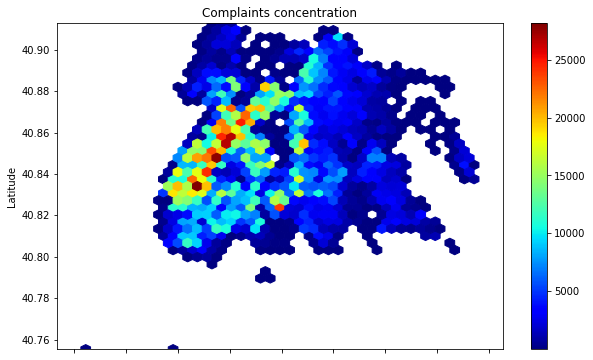

In [27]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,colormap = 'jet',mincnt=1,title = 'Complaints concentration', figsize=(10,6)).axis('equal')

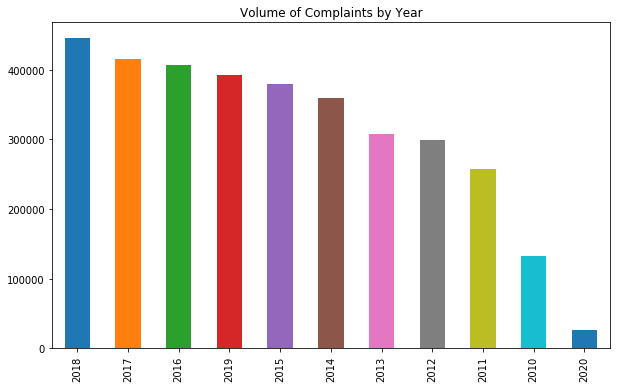

In [28]:
##### Complaints by Year 

df['Year'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Year')

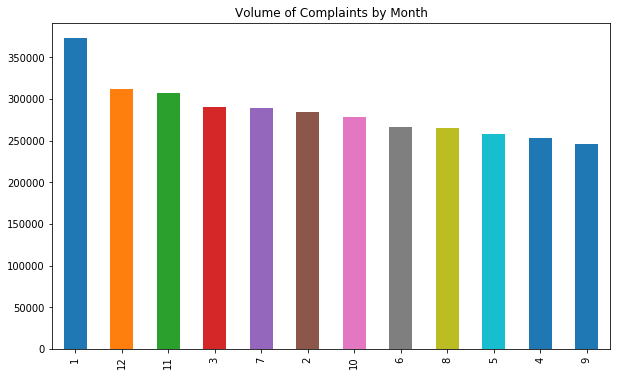

In [29]:
df['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Month')

#### January,October-Novemeber and May are of most complaints

#############################################################################################################
#############################################################################################################

### Complaint Type : Target Variable Analysis and MeRGINGS

In [30]:
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)

df['Complaint Type'] = df['Complaint Type'].apply(to_lower)

In [31]:
df['Complaint Type'].value_counts()

noise  residential                       452733
heathot water                            408264
heating                                  189987
plumbing                                 179639
blocked driveway                         156203
unsanitary condition                     136635
paintplaster                             115077
water system                             111168
illegal parking                          101584
street condition                         100922
general construction                     100678
noise  streetsidewalk                    94334 
paint  plaster                           73777 
electric                                 72008 
doorwindow                               65755 
water leak                               61791 
rodent                                   50696 
dirty conditions                         48575 
nonconst                                 47461 
flooringstairs                           44263 
general                                 

In [32]:
df[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,sewer,catch basin sunkendamagedraised sc
1,water system,hydrant running wc
2,rodent,rat sight
3,rodent,rat sight
4,street condition,pothol
5,street condition,pothol
6,street condition,pothol
7,street condition,pothol
8,derelict vehicles,derelict vehicl
9,sanitation condition,dead anim


###### Heat Complaints

In [33]:
df[df['Complaint Type'].str.contains("cool") ][['Complaint Type',"Descriptor"]]

,Complaint Type,Descriptor
82960,cooling tower,brokendefect
12957,cooling tower,unsanitary condit
56581,cooling tower,unsanitary condit
58693,cooling tower,unsanitary condit
67048,cooling tower,brokendefect
29025,cooling tower,brokendefect
85730,cooling tower,unsanitary condit
112947,cooling tower,unsanitary condit
8786,cooling tower,unsanitary condit
41934,cooling tower,unsanitary condit


In [34]:
df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique()

array(['heathot water', 'nonresidential heat', 'heating'], dtype=object)

In [35]:
df['Complaint Type'] = df['Complaint Type'].replace(['heathot water', 'nonresidential heat','heating'], 'HeatComplaints')

##### Noise Complaints

In [36]:
df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique()

array(['noise  residential', 'noise  commercial', 'noise  vehicle',
       'noise', 'noise  streetsidewalk', 'noise  house of worship',
       'noise  park', 'collection truck noise', 'noise  helicopter',
       'noise survey'], dtype=object)

##### Whats a Noise Survey Means?

In [37]:
df[df['Complaint Type'].str.contains("noise survey") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
98948,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
98951,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
98965,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
98966,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
98968,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1


###### Its noise created by people and they 3-1-1 to complain. 311 is non emergency phone number

In [38]:
df['Complaint Type'] = df['Complaint Type'].replace(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], 'NoiseComplaints')

##### Construction/Plumbing Complaints

In [39]:
df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique()

array(['plumbing', 'general constructionplumbing',
       'construction safety enforcement', 'general construction',
       'construction lead dust', 'construction'], dtype=object)

In [40]:
df['Complaint Type'] = df['Complaint Type'].replace(['general constructionplumbing', 'construction safety enforcement',
       'construction lead dust', 'general construction', 'construction','plumbing'],'Construction/PlumbingComplaints')

###### Parking Complaints

In [41]:
df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique()

array(['blocked driveway', 'illegal parking', 'violation of park rules',
       'broken parking meter', 'municipal parking facility',
       'animal in a park', 'trafficillegal parking',
       'dof parking  payment issue'], dtype=object)

In [42]:
df[df['Complaint Type'].str.contains("dof parking  payment issue") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
117444,dof parking payment issue,person reflect,see not,DOF


##### Note dof parking payment: comes under dof issues because you will know what type of complaint in descriptor

In [43]:
# Note dof parking payment comes under dof issues because you will know what type of complaint in descriptor

df['Complaint Type'] = df['Complaint Type'].replace(['illegal parking', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking','violation of park rules','blocked driveway'],'ParkingComplaints')

##### DOF issues (Department of Fiance)

In [44]:
df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique()

array(['dof property  payment issue', 'dof property  reduction issue',
       'dof parking  payment issue'], dtype=object)

In [45]:
df['Complaint Type'] = df['Complaint Type'].replace(['dof property  payment issue', 'dof property  owner issue',
       'dof property  request copy', 'dof property  reduction issue',
       'dof property  city rebate', 'dof parking  payment issue',
       'dof property  property value', 'dof property  rpie issue',
       'dof property  state rebate', 'dof parking  tax exemption',
       'dof property  update account'],'DOFComplaints')

###### Paint Plaster Issues

In [46]:
df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique()

array(['paintplaster', 'paint  plaster'], dtype=object)

In [47]:
df['Complaint Type'] = df['Complaint Type'].replace(['paintplaster', 'paint  plaster'],'Paint/PlasterComplaints')

##### Water Complaints

In [48]:
df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique()

array(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'bottled water',
       'drinking water'], dtype=object)

In [49]:
df['Complaint Type'] = df['Complaint Type'].replace(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'],'WaterComplaints')

##### SanitaryCompalints

In [50]:
df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique()

array(['sanitation condition', 'dirty conditions'], dtype=object)

In [51]:
df['Complaint Type'] = df['Complaint Type'].replace(['unsanitary pigeon condition',
    'unsanitary condition','dirty conditions','unsanitary animal pvt property','sanitation condition'],'SanitationComplaints')

###### Highway Complaints

In [52]:
df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique()

array(['highway condition', 'highway sign  damaged',
       'highway sign  missing', 'highway sign  dangling'], dtype=object)

In [53]:
df['Complaint Type'] = df['Complaint Type'].replace(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'],'HighwayComplaints')

###### Street/Vehicle/TreeCompalints

In [54]:
df[df['Complaint Type'].str.contains("tree|sidewalk|vehicle") ]["Complaint Type"].unique()

array(['street condition', 'derelict vehicles', 'street light condition',
       'new tree request', 'for hire vehicle complaint',
       'derelict vehicle', 'sidewalk condition', 'street sign  dangling',
       'street sign  missing', 'street sign  damaged',
       'rootsewersidewalk condition', 'damaged tree',
       'overgrown treebranches', 'illegal tree damage', 'dead tree',
       'for hire vehicle report', 'deaddying tree',
       'request xmas tree collection', 'abandoned vehicle',
       'dep sidewalk condition', 'dep street condition',
       'homeless street condition', 'city vehicle placard complaint'],
      dtype=object)

###### Checking ("request xmas tree collection","homeless street condition")

In [55]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("request xmas tree collection","homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
97236,c request xmas trees collect,department sanitation removed item
97237,c request xmas trees collect,department sanitation cleaned loc
97440,c request xmas trees collect,department sanitation removed item
97496,c request xmas trees collect,department sanitation removed item
97504,c request xmas trees collect,department sanitation removed item


In [56]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
85152,nan,police department responded complaint information available observed evid
98014,nan,police department responded complaint information available observed evid
102652,nan,complaint fall police departments jurisdict
103463,nan,police department responded complaint took action fix condit
113050,nan,police department responded complaint took action fix condit


In [57]:
#graffiti
pd.set_option('display.max_colwidth', 1)

df[df['Complaint Type'].str.contains("graffiti") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
120,graffiti,city removed graffiti properti
221,graffiti,city inspected property cleaning graffiti found
289,graffiti,city removed graffiti properti
318,graffiti,city inspected property cleaning graffiti found
1267,graffiti,city removed graffiti properti


##### I am removing homeless street condition as it comes under HomelessComplaints

In [58]:
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

##### Sewer Complaints,Traffic,Homeless

In [59]:
df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique()


array(['sewer', 'indoor sewage'], dtype=object)

In [60]:
df['Complaint Type'] = df['Complaint Type'].replace(['sewer','indoor sewage'],'SewerComplaints')

##### Homeless Complaints

In [61]:
df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique()

array(['homeless encampment', 'homeless person assistance',
       'homeless street condition'], dtype=object)

In [62]:
df['Complaint Type'] = df['Complaint Type'].replace(['homeless street condition',
                                                     'homeless encampment', 'homeless person assistance'],'HomelessComplaints')

In [63]:
df[df['Complaint Type'].str.contains("traffic|signal") ]["Complaint Type"].unique()

array(['traffic signal condition', 'traffic'], dtype=object)

In [64]:
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')

##### Taxi Complaints

In [65]:
df[df['Complaint Type'].str.contains("taxi") ]["Complaint Type"].unique()

array(['taxi complaint', 'taxi report', 'taxi compliment',
       'dispatched taxi complaint'], dtype=object)

In [66]:
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')

###### Building Complaints

In [67]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ]["Complaint Type"].unique()

array(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'building condition', 'building marshals office'], dtype=object)

###### Checking the Building Complaints in detail

In [68]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ][["Complaint Type","Descriptor","Resolution Description"]]

,Complaint Type,Descriptor,Resolution Description
39,doorwindow,door,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
40,doorwindow,door,department housing preservation development inspected following conditions violations issued complaint clos
42,flooringstairs,floor,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
43,doorwindow,window fram,department housing preservation development inspected following conditions violations issued complaint clos
44,flooringstairs,floor,department housing preservation development inspected following conditions violations issued complaint clos
46,doorwindow,window fram,department housing preservation development inspected following conditions violations issued complaint clos
47,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
79,buildinguse,illegal conversion residential buildingspac,department buildings investigated complaint issued office administrative trials hearings oath summon
137,doorwindow,door,department housing preservation development inspected following conditions violations issued complaint clos
140,doorwindow,window fram,department housing preservation development inspected following conditions violations issued complaint clos


In [69]:
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')

##### Rodent

In [70]:
df[df['Complaint Type'].str.contains("rodent|cockroach|pest") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
2,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
3,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
35,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
101,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
191,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu


In [71]:
df[df['Complaint Type'].str.contains("broken muni meter") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
1042,receipt,department transportation inspected condition reported find additional information notes customer field
7094,receipt,department transportation inspected condition reported find additional information notes customer field
8402,receipt,department transportation completed request corrected condit
9057,order,department transportation completed request corrected condit
18511,coin card regist,department transportation inspected condition reported find additional information notes customer field


In [72]:
df[df['Complaint Type'].str.contains("request large bulky item collection") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
33705,request large bulky item collect,nan
34358,request large bulky item collect,nan
34477,request large bulky item collect,nan
34478,request large bulky item collect,nan
34757,request large bulky item collect,nan


In [73]:
df['Complaint Type'].value_counts()

NoiseComplaints                          645002
HeatComplaints                           598267
Construction/PlumbingComplaints          310803
StreetComplaints                         307284
ParkingComplaints                        265473
SanitationComplaints                     222834
Paint/PlasterComplaints                  188854
WaterComplaints                          183290
BuildingComplaints                       175017
electric                                 72008 
rodent                                   50696 
nonconst                                 47461 
general                                  40782 
SewerComplaints                          36511 
appliance                                32003 
consumer complaint                       24213 
TrafficComplaints                        21655 
missed collection all materials          19081 
request large bulky item collection      18212 
safety                                   13739 
broken muni meter                       

In [74]:
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [75]:
df['Complaint Type'].value_counts()

NoiseComplaints                        645002
HeatComplaints                         598267
Construction/PlumbingComplaints        310803
StreetComplaints                       307284
ParkingComplaints                      265473
SanitationComplaints                   222834
Paint/PlasterComplaints                188854
WaterComplaints                        183290
BuildingComplaints                     175017
Other Complaints                       151614
electric                               72008 
rodent                                 50696 
nonconst                               47461 
general                                40782 
SewerComplaints                        36511 
consumer complaint                     24213 
TrafficComplaints                      21655 
missed collection all materials        19081 
request large bulky item collection    18212 
broken muni meter                      12395 
HomelessComplaints                     6170  
air quality                       

In [76]:
df[df['Complaint Type'].str.contains("vending|food establishment") ][["Complaint Type","Descriptor","Resolution Description"]].head()

,Complaint Type,Descriptor,Resolution Description
4007,vending,unlicens,police department responded complaint determined police action necessari
4264,vending,prohibited area,police department responded upon arrival responsible condition gon
4611,vending,prohibited area,police department responded complaint took action fix condit
5253,vending,unlicens,police department responded complaint took action fix condit
8244,vending,unlicens,police department responded complaint took action fix condit


In [77]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')

##### Vending Complaints comes uder Street Complaints

In [78]:
df['Complaint Type'].value_counts()

NoiseComplaints                        645002
HeatComplaints                         598267
Construction/PlumbingComplaints        310803
StreetComplaints                       310786
ParkingComplaints                      265473
SanitationComplaints                   222834
Paint/PlasterComplaints                188854
WaterComplaints                        183290
BuildingComplaints                     175017
Other Complaints                       151614
electric                               72008 
rodent                                 50696 
nonconst                               47461 
general                                40782 
SewerComplaints                        36511 
consumer complaint                     24213 
TrafficComplaints                      21655 
missed collection all materials        19081 
request large bulky item collection    18212 
broken muni meter                      12395 
HomelessComplaints                     6170  
air quality                       

##### Revisiting Location Type (Only doing it for highest amount of variables)

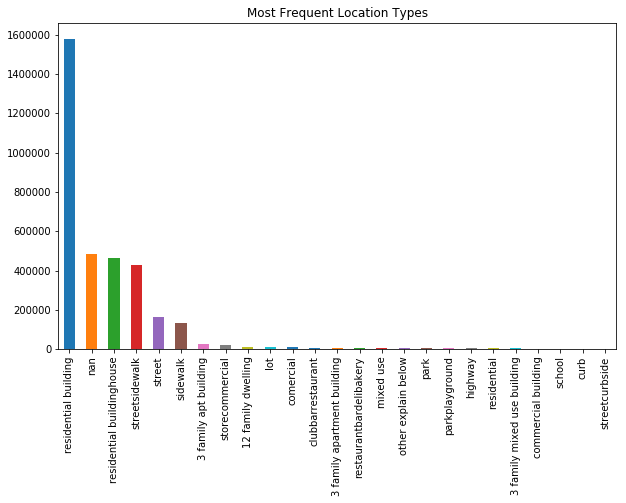

In [79]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

In [80]:
df['Location Type'].unique()

array(['nan', '12 family dwelling', '3 family apt building', 'street',
       'sidewalk', 'residential building', 'residential buildinghouse',
       'streetsidewalk', 'lot', 'storecommercial',
       '3 family mixed use building', 'residential',
       '3 family apartment building', 'comercial', 'other',
       'commercial building', '12 family mixed use building', 'mixed use',
       'highway', 'crosswalk', 'clubbarrestaurant', 'government building',
       'other explain below', 'parking lotgarage', 'parkplayground',
       'house of worship', 'vacant building', 'day carenursery', 'park',
       'school', 'vacant lot', 'parking lot', 'schoolpreschool',
       'single room occupancy sro', 'construction site',
       'abandoned building', 'public gardenpark', 'catch basinsewer',
       'tire shop', 'house and store', 'pool', 'restaurantbardelibakery',
       'hospital', 'public garden', 'public stairs', 'bus stop shelter',
       'streetcurbside', 'senior center', 'curb', 'office buil

In [81]:
df[df['Location Type'].str.contains("residential") ]["Location Type"].unique()

array(['residential building', 'residential buildinghouse', 'residential',
       'residential property', 'building nonresidential'], dtype=object)

In [82]:
df['Location Type'] = df['Location Type'].replace(['residential building', 'residential', 'residential buildinghouse',
       'residential property'],'RESIDENTIAL')

In [83]:
df[df['Location Type'].str.contains("school") ]["Location Type"].unique()

array(['school', 'schoolpreschool', 'cafeteria  public school',
       'cafeteria  private school', 'school safety zone',
       'private school', 'public school'], dtype=object)

In [84]:
df['Location Type'] = df['Location Type'].replace(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'],'SCHOOL')

In [85]:
df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique()

array(['3 family apartment building', 'apartment', 'apartment building'],
      dtype=object)

In [86]:
df['Location Type'] = df['Location Type'].replace(['3 family apartment building', 'apartment', 'apartment building'],'SCHOOL')

In [87]:
df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique()

array(['storecommercial', 'comercial', 'commercial building',
       'commercial', 'commercial property'], dtype=object)

In [88]:
df['Location Type'] = df['Location Type'].replace(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'],'COMMERCIAL')

In [89]:
df[df['Location Type'].str.contains("play|park") ]["Location Type"].unique()

array(['parking lotgarage', 'parkplayground', 'park', 'parking lot',
       'public gardenpark', 'public parkgarden'], dtype=object)

##### Remove parking lotgrarage

In [90]:
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')

In [91]:
df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique()

array(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'], dtype=object)

In [92]:
df['Location Type'] = df['Location Type'].replace(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'],'RESTAURANT')

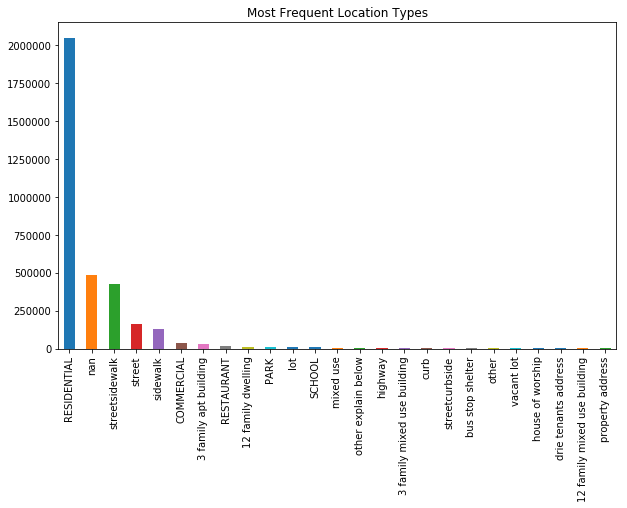

In [93]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

## Status Variable

In [94]:
df['Status'].unique()

array(['Closed', 'Pending', 'Started', 'Assigned', 'Open', 'Unassigned',
       'In Progress'], dtype=object)

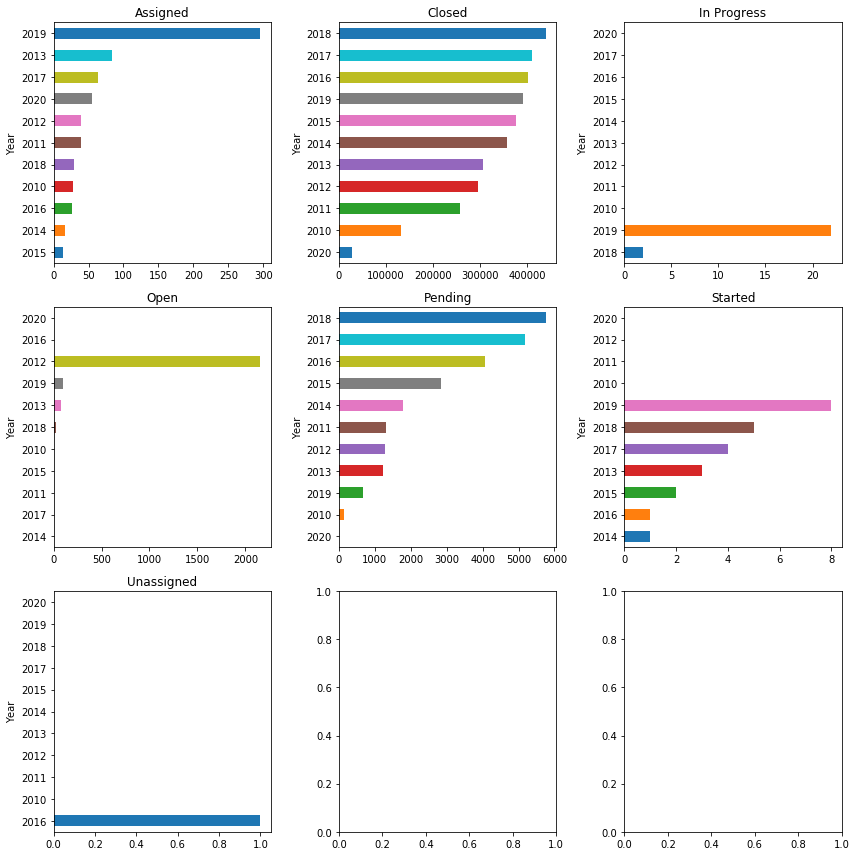

In [95]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [96]:
df[df['Status']!='Closed'][["Complaint Type","Status","Descriptor","Year","Resolution Description"]]

,Complaint Type,Status,Descriptor,Year,Resolution Description
8,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
195,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
198,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
847,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
859,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
945,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
1109,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
1197,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
1371,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
2378,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item


#### Derelict Vehicle means Abondend Vehicle they cant stay for years on streets some one will report or authorities with take a look so the incidents below certain year can be removed as they forgot to close the request
It can be observed that

1. There are many direlict vehicle complaints reported few years ago and "Department of Sanitation has removed vehicles" but the incidents were not closed

##### I have to remove above rows as they are outliers and are supposed to be closed

In [97]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
8,27842763,2014-04-14 08:30:00,2014-04-14 12:00:00,DSNY,BCC - Bronx,StreetComplaints,derelict vehicl,street,10457,464 EAST 179 STREET,...,Unspecified,BRONX,40.849788,-73.897075,"(40.84978837706446, -73.8970750019827)",0.0,0.0,2014,4,0
195,27844518,2014-04-14 10:34:00,2014-04-14 12:00:00,DSNY,Bronx 11,StreetComplaints,derelict vehicl,street,10462,SACKET AVENUE,...,Unspecified,BRONX,40.843539,-73.854375,"(40.843539333589824, -73.85437522711274)",0.0,0.0,2014,4,0
198,27844539,2014-04-14 15:19:00,2014-04-14 15:19:00,DSNY,Bronx 10,StreetComplaints,derelict vehicl,street,10461,1601 PLYMOUTH AVENUE,...,Unspecified,BRONX,40.843742,-73.831999,"(40.843742214108765, -73.83199895775188)",0.0,0.0,2014,4,0
847,27850748,2014-04-15 10:14:00,2014-04-15 12:00:00,DSNY,BCC - Bronx,StreetComplaints,derelict vehicl,street,10470,4645 BULLARD AVENUE,...,Unspecified,BRONX,40.904423,-73.854777,"(40.904422688885305, -73.85477722191641)",0.0,0.0,2014,4,1
859,27850871,2014-04-15 17:47:00,2014-04-15 17:47:00,DSNY,Bronx 11,StreetComplaints,derelict vehicl,street,10461,NaN,...,Unspecified,BRONX,40.841692,-73.841433,"(40.841691545790596, -73.84143342680592)",0.0,0.0,2014,4,1
945,27851657,2014-04-15 10:46:00,2014-04-15 12:00:00,DSNY,Bronx 11,StreetComplaints,derelict vehicl,street,10462,991 VAN NEST AVENUE,...,Unspecified,BRONX,40.846664,-73.855543,"(40.846664282246486, -73.8555430687229)",0.0,0.0,2014,4,1
1109,27853122,2014-04-15 11:17:00,2014-04-15 12:00:00,DSNY,Bronx 11,StreetComplaints,derelict vehicl,street,10469,3237 HERING AVENUE,...,Unspecified,BRONX,40.872042,-73.853626,"(40.872042137987485, -73.8536258050142)",0.0,0.0,2014,4,1
1197,27853894,2014-04-15 10:43:00,2014-04-15 12:00:00,DSNY,BCC - Bronx,StreetComplaints,derelict vehicl,street,10469,3232 ELY AVENUE,...,Unspecified,BRONX,40.875568,-73.838684,"(40.87556836685677, -73.83868404349575)",0.0,0.0,2014,4,1
1371,27855524,2014-04-16 15:28:00,2014-04-16 15:28:00,DSNY,BCC - Bronx,StreetComplaints,derelict vehicl,street,10467,3731 OLINVILLE AVENUE,...,Unspecified,BRONX,40.882849,-73.865804,"(40.882849078677346, -73.86580366212792)",0.0,0.0,2014,4,2
2378,27863575,2014-04-17 13:09:00,2014-04-17 13:09:00,DSNY,BCC - Bronx,StreetComplaints,derelict vehicl,street,10473,2310 TURNBULL AVENUE,...,Unspecified,BRONX,40.824471,-73.845698,"(40.82447149026861, -73.84569829677969)",0.0,0.0,2014,4,3


##### I am changing the status of those incidents that has to be closed 

In [98]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

    

In [99]:
#df.drop(df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )].index,inplace = True)

In [100]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek


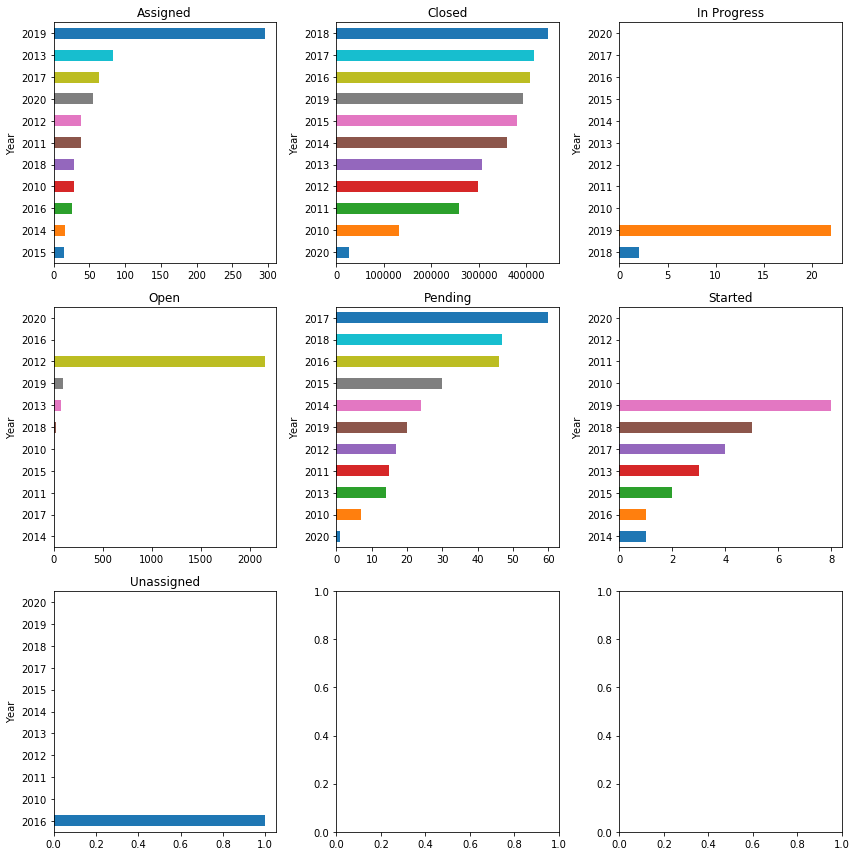

In [101]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [102]:
df.shape

(3423117, 34)

In [103]:
df = df[df['Location Type'] != 'nan']

###########################################################################################################################
#################################################################################################################################################

## MULTI CLASS CLASSIFICATION  

----> Example : A fruit is ORANGE ,APPLE OR PEAR but not both or all three

1. As it is a classification task with more than 2 classes and "IMBALANCED DATASET" 
2. (Classification classess are not of same quanitiy)
3. I want to use LOGISTIC REGRESSION / KERAS/ CSR MATRIX CROSS VALIDATION
 

In [104]:
df_model = df[["Agency","Descriptor","Complaint Type","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [105]:
df_model.dropna(how='any')

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
2,DOHMH,rat sight,rodent,12 family dwelling,Bronx,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.877717,-73.873842,4.0,4.0,2014,4,0
3,DOHMH,rat sight,rodent,3 family apt building,Bronx,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.879075,-73.907260,8.0,8.0,2014,4,0
8,DSNY,derelict vehicl,StreetComplaints,street,Bronx,Closed,department sanitation removed item,40.849788,-73.897075,0.0,0.0,2014,4,0
9,DSNY,dead anim,SanitationComplaints,sidewalk,Bronx,Closed,department sanitation investigated complaint found condition loc,40.830384,-73.856991,0.0,0.0,2014,4,0
10,HPD,refriger,Other Complaints,RESIDENTIAL,Bronx,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.820984,-73.895736,8.0,8.0,2014,4,0
11,NYPD,loud musicparti,NoiseComplaints,RESIDENTIAL,Bronx,Closed,police department responded complaint information available observed evidence violation tim,40.883890,-73.892650,0.0,0.0,2014,4,1
12,HPD,toilet,Construction/PlumbingComplaints,RESIDENTIAL,Bronx,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.846031,-73.907465,2.0,2.0,2014,4,0
13,HPD,smoke detector,Other Complaints,RESIDENTIAL,Bronx,Closed,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd,40.846031,-73.907465,2.0,2.0,2014,4,0
14,HPD,refriger,Other Complaints,RESIDENTIAL,Bronx,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.837467,-73.916642,9.0,9.0,2014,4,0
15,HPD,pest,SanitationComplaints,RESIDENTIAL,Bronx,Closed,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint,40.865979,-73.890994,14.0,14.0,2014,4,0


In [106]:
df_model.shape

(2936939, 14)

In [107]:
df_model_label = df_model.copy()

In [108]:
label_encoder = LabelEncoder()
df_model_label['Agency']=label_encoder.fit_transform(df_model['Agency'])
df_model_label['Descriptor']=label_encoder.fit_transform(df_model['Descriptor'])
df_model_label['City']=label_encoder.fit_transform(df_model['City'])
df_model_label['Status']=label_encoder.fit_transform(df_model['Status'])
df_model_label['Resolution Description']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model_label['Complaint Type']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model_label['Location Type']=label_encoder.fit_transform(df_model['Location Type'])

In [109]:
df_model_label.head()

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
2,7,419,24,0,0,1,197,40.877717,-73.873842,4.0,4.0,2014,4,0
3,7,419,24,4,0,1,197,40.879075,-73.907260,8.0,8.0,2014,4,0
8,11,5,12,88,0,1,354,40.849788,-73.897075,0.0,0.0,2014,4,0
9,11,4,10,80,0,1,327,40.830384,-73.856991,0.0,0.0,2014,4,0
10,13,422,7,8,0,1,249,40.820984,-73.895736,8.0,8.0,2014,4,0


## Feature Engineering

### Correlation

1. Correlation is from 0 to 1 where 0 indicates least correlation and 1 indicates highest

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
Agency,1.000000,-0.050807,-0.394431,-0.125711,-0.014294,-0.001091,0.366785,-0.008938,-0.092337,-0.096387,-0.159654,0.053520,0.004063,0.113567
Descriptor,-0.050807,1.000000,0.092939,-0.206390,0.002234,0.010621,-0.076384,-0.017493,-0.055553,0.043844,0.072662,-0.106083,0.012198,-0.019984
Complaint Type,-0.394431,0.092939,1.000000,0.267838,-0.001975,0.003621,0.027271,-0.000621,0.117947,0.052726,0.087274,0.023580,0.024226,-0.047304
Location Type,-0.125711,-0.206390,0.267838,1.000000,0.002318,-0.008094,0.409883,0.026837,0.221366,0.006887,0.012297,0.083597,0.016614,0.021591
City,-0.014294,0.002234,-0.001975,0.002318,1.000000,-0.000196,-0.001863,-0.007167,0.008410,0.000243,0.000408,-0.003542,-0.001807,-0.001099
Status,-0.001091,0.010621,0.003621,-0.008094,-0.000196,1.000000,-0.009743,0.001985,-0.000253,0.003217,-0.005531,-0.028020,0.000057,-0.004095
Resolution Description,0.366785,-0.076384,0.027271,0.409883,-0.001863,-0.009743,1.000000,0.003816,0.090670,-0.082055,-0.137636,0.008657,0.018702,0.172606
Latitude,-0.008938,-0.017493,-0.000621,0.026837,-0.007167,0.001985,0.003816,1.000000,0.264598,0.002734,0.003715,-0.017310,-0.004732,0.003040
Longitude,-0.092337,-0.055553,0.117947,0.221366,0.008410,-0.000253,0.090670,0.264598,1.000000,0.010642,0.016948,-0.000140,0.004791,0.005622
Total_Time,-0.096387,0.043844,0.052726,0.006887,0.000243,0.003217,-0.082055,0.002734,0.010642,1.000000,0.594417,-0.033032,0.013151,-0.025234


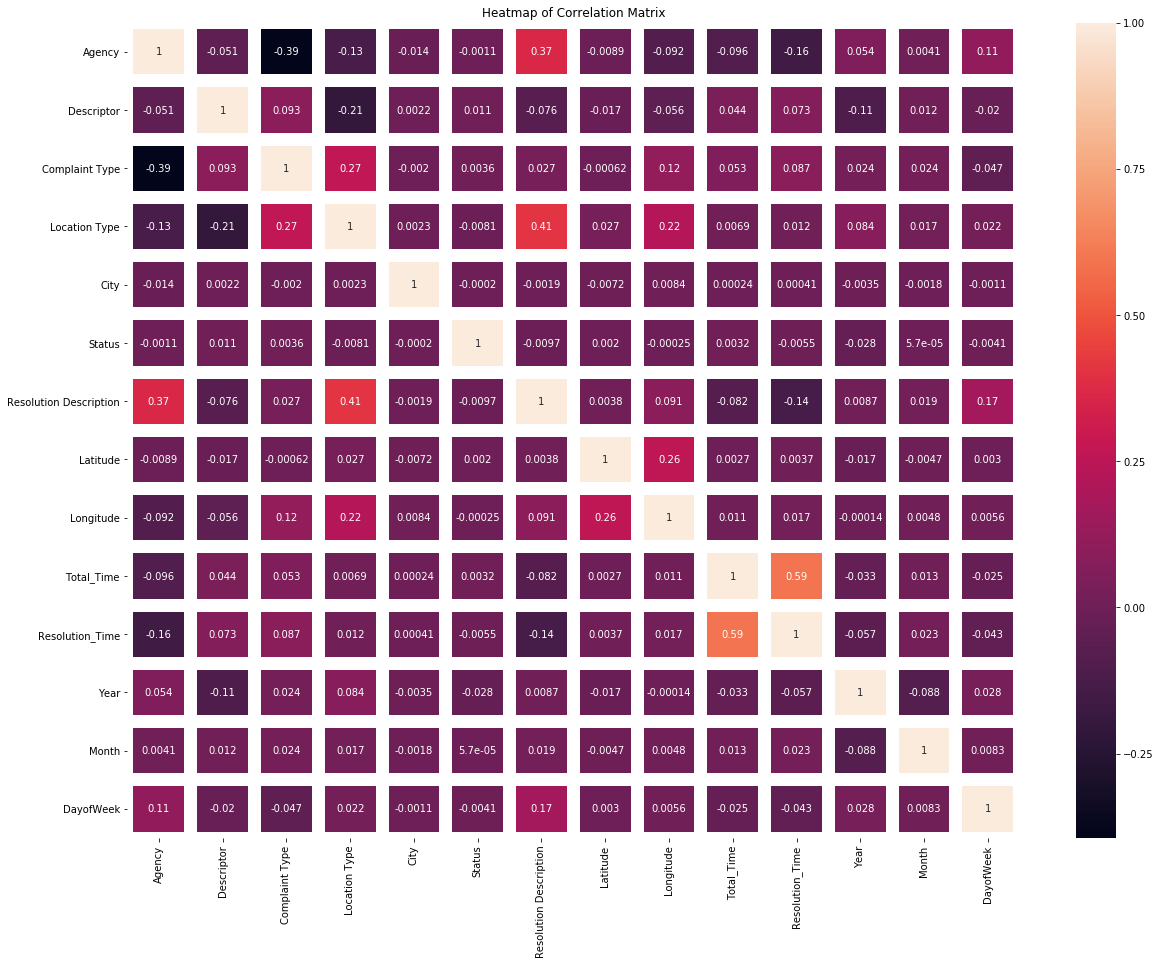

In [110]:
corr = df_model_label.corr()
fig, ax = plt.subplots(figsize=(20,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
corr

1. Complaint Type is correlated to Location Type
2. Resolution Description and Agency are correlated

In [111]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

X = df_model[["Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type"]

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)

### Feature Importance and Selection

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Descriptor                0.476970
Resolution Description    0.127493
Agency                    0.123323
Location Type             0.102842
Total_Time                0.053374
Resolution_Time           0.052870
Year                      0.037708
Month                     0.016008
DayofWeek                 0.009303
Status                    0.000096
City                      0.000013
dtype: float64

No handles with labels found to put in legend.


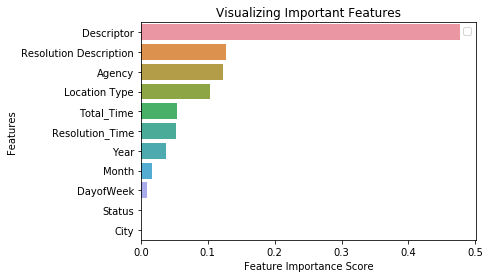

In [113]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Baseline Model : Logistic Regression

In [114]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [115]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
import sklearn.metrics as metrics
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 173166
Accuracy: 0.59


####### the above gives the misclassifed samples 
##### Evaluate the model thru Confusion Matrix but here its multi class so hard to understand but lets calculate precision and accuracy

In [117]:
cnf_matrix = metrics.confusion_matrix(test_lbl, y_pred)
cnf_matrix

array([[ 2866,  4425,     0,  5983,     0,     0,     5,     1,  1522,
            0,  1488,     0,     8,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     2,     0],
       [ 1797, 21609,     0, 12849,     0,     0,    34,     0,  1114,
            0,  1151,     0,     9,     0,     0,     0,     0,     0,
            0,     0,   630,     0,     0,     0,     0],
       [    0,     0,    48,     0,     0,     0,     0,     0,     0,
            0,     0,     0,    34,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    15,    19],
       [   22,  2762,     0, 82460,     0,     0,   113,    32,     8,
            0,    80,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     6,     0,     0,     0,     3],
       [    0,     0,     0,    40,    15,     0,     0,   489,     0,
            0,   153,     0,    54,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


We have to take accuracy into consideration as it is very less for our baseline model lets try with random forest classifer as tree based modelsa are robust and works well for classification

In [118]:
np.diag(cnf_matrix)

array([ 2866, 21609,    48, 82460,    15,     0, 75637,   458,  2294,
       30333,  1702,     0, 22256,    75,     1,     0,     0,     1,
           0,     0,   131,     6,     0,   690,  5815], dtype=int64)

In [119]:
np.sum(cnf_matrix, axis = 0)

array([ 17260,  61976,     54, 132316,     15,      1,  86247,   1251,
         9570,  45589,   8502,      1,  45270,    138,      2,      9,
            2,      1,      0,      0,    778,     22,      0,   1154,
         9405], dtype=int64)

In [120]:
recall = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1))

In [121]:
(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.16604867, 0.34866723, 0.88888889, 0.62320505, 1.        ,
       0.        , 0.87698123, 0.36610711, 0.23970742, 0.66535787,
       0.20018819, 0.        , 0.49162801, 0.54347826, 0.5       ,
       0.        , 0.        , 1.        ,        nan,        nan,
       0.16838046, 0.27272727,        nan, 0.59792028, 0.61828814])

In [122]:
precision = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [123]:
print("precision",precision)
print("recall",recall)

precision nan
recall 0.2497456885879184


Accuracy is the main metric for multi class classification as precision and recall scores doesnt play an important role as we are taking aaverage of individual classes (Each complaint Type)

### Random Forests Classification

My favourite is tree based models as they work faster and works well with classification 
Its used to identify feature importance too

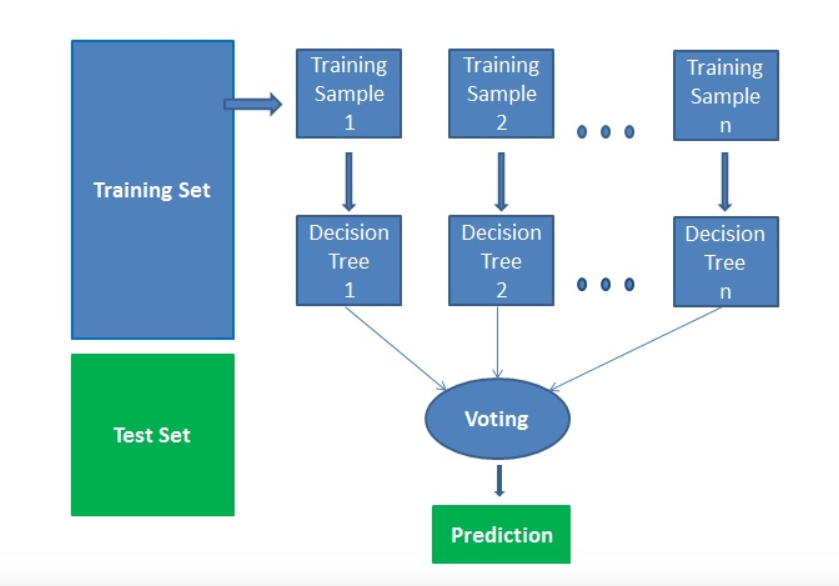

In [124]:
from IPython.display import Image
Image(filename='rf.png')

In [125]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

In [126]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9939052210804443


In [127]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 5370


#### Checking if my model is overfitting --- 10 Fold CV

In [128]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.93864613 0.90355563 0.90854304 0.90468878 0.87155086 0.86391232
 0.87369973 0.8960897  0.93464041 0.90817247]


My number of missclassifed samples are extremely less and thats why accuracy score went up which is good

Ideas!!

How  about holidays and Season? Does these complaints go up or what kind of complaints can be expected


## Season

In [129]:
conditions =[
    (df['Month']==1 )| (df['Month']==12)| (df['Month']==2),
    (df['Month']==3) | (df['Month']==4) | ( df['Month']==5),
    (df['Month']==6) | (df['Month']==7) | (df['Month']==8),
    (df['Month']==9)|(df['Month']==10)| (df['Month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

In [130]:

df_model = df[["Agency","Descriptor","Complaint Type","Season","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

label_encoder = LabelEncoder()
df_model['Agency.']=label_encoder.fit_transform(df_model['Agency'])
df_model['Descriptor.']=label_encoder.fit_transform(df_model['Descriptor'])
df_model['City.']=label_encoder.fit_transform(df_model['City'])
df_model['Status.']=label_encoder.fit_transform(df_model['Status'])
df_model['Resolution Description.']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model['Complaint Type.']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model['Location Type.']=label_encoder.fit_transform(df_model['Location Type'])
df_model['Season.']=label_encoder.fit_transform(df_model['Season'])




C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

No handles with labels found to put in legend.


Descriptor.                0.467981
Resolution Description.    0.129460
Agency.                    0.115883
Location Type.             0.096235
Total_Time                 0.071097
Resolution_Time            0.046894
Year                       0.039788
DayofWeek                  0.012183
Month                      0.012060
Season.                    0.008314
Status.                    0.000089
City.                      0.000015
dtype: float64


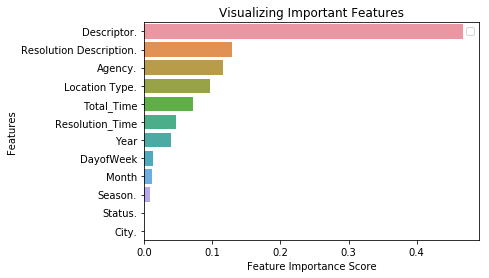

In [131]:
X = df_model[["Agency.","Descriptor.","Location Type.","City.","Status.","Resolution Description.","Season.","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type."]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [132]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9911358988153203


##### TF IDF

#df_model_loctype = df[["Agency","Location","Location Type","City","Incident Zip","Latitude","Longitude"]]
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix

## APPLYING COUNT VECTORIZATION THAT CONVERTS IT INTO A SPARSE AMTRIX

cv = CountVectorizer(min_df=10)
X_ResDes = cv.fit_transform(df['Resolution Description'])
X_ResDes

##############################################################################################

cv = CountVectorizer()
X_LocType = cv.fit_transform(df['Location Type'])
X_LocType
#################################################################################################

## TF IDF Vectorization ----> More importance is given to rare words
## Count Vectorizor --> Gives the frequencies of Words
## Label Binarizer --> Coverts G,B,R --> 1,2,3

################################################################################################

cv = CountVectorizer()
X_Des = cv.fit_transform(df['Descriptor'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_Des

###############################################################################################

# Apply TFIDF to "resolution_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df['Resolution Description'])

tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df['Descriptor'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Loc = lb.fit_transform(df['Location Type'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Com = lb.fit_transform(df['Complaint Type'])

#####################################################################################################

####### Creating CSR Matrix

####### Merging the Sparse Matrices

# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df[['Agency','City', 'Status','Latitude',
                                                'Longitude','Total_Time','Resolution_Time',
                                                'Year','Month','DayofWeek']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_Loc,X_Com)).tocsr()

####################################################################################################

X_train = sparse_merge[:len(df)]

y = sparse_merge[len(df):]

from sklearn.model_selection import KFold
eval_size = .10
kf = KFold(10,shuffle=False)
i = 0
for train_indicies, valid_indicies in kf.split(X_train,y):
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, y_train = X_train[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train[valid_indicies], y[valid_indicies]
    i = i+1